In [22]:
# Usar wget para baixar diretamente o dataset do Kaggle (sem necessidade do arquivo kaggle.json)
!wget https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/download?datasetVersionNumber=1 -O daily-climate-time-series-data.zip

# Descompactar o arquivo
!unzip daily-climate-time-series-data.zip


--2024-10-05 18:05:10--  https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fsumanthvrao%2Fdaily-climate-time-series-data%2Fversions%2F1%3Fresource%3Ddownload [following]
--2024-10-05 18:05:10--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fsumanthvrao%2Fdaily-climate-time-series-data%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘daily-climate-time-series-data.zip’

daily-climate-time-   

In [23]:
# Carregar o dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv')

# Visualizar as primeiras linhas
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


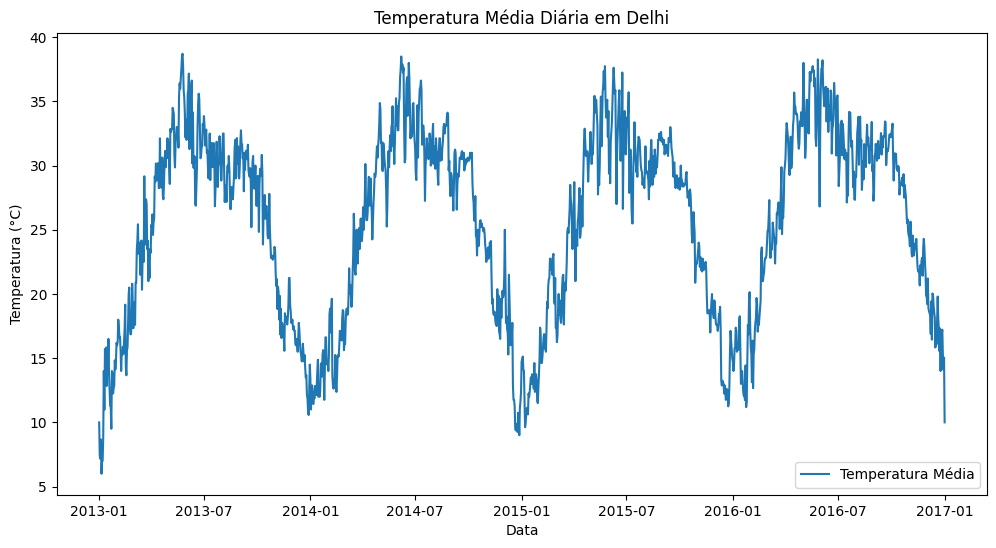

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df['meantemp'], label='Temperatura Média')
plt.title('Temperatura Média Diária em Delhi')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


In [28]:
df_prophet = df.reset_index()[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})


In [29]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcrd9v14/kjay08ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcrd9v14/3mtljwtl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67531', 'data', 'file=/tmp/tmpfcrd9v14/kjay08ll.json', 'init=/tmp/tmpfcrd9v14/3mtljwtl.json', 'output', 'file=/tmp/tmpfcrd9v14/prophet_model2ql54lh5/prophet_model-20241005180512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


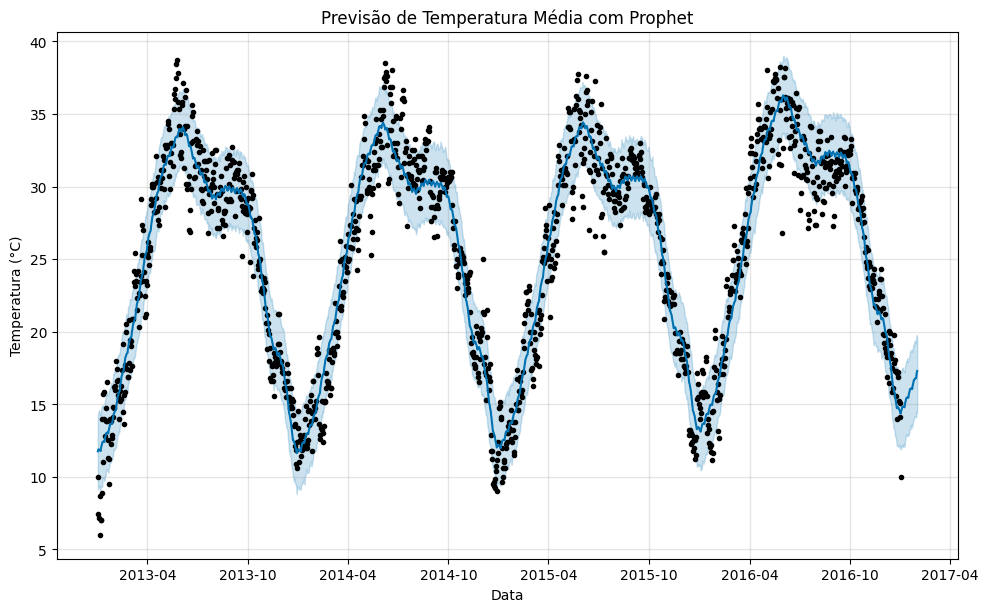

In [31]:
# Plotar as previsões
model_prophet.plot(forecast)
plt.title('Previsão de Temperatura Média com Prophet')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()


In [32]:
# Dividir em treino e teste
train_size = int(len(df_prophet) * 0.8)
df_train_prophet = df_prophet[:train_size]
df_test_prophet = df_prophet[train_size:]


In [33]:
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcrd9v14/5otca_ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfcrd9v14/5w0vnme6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10410', 'data', 'file=/tmp/tmpfcrd9v14/5otca_ns.json', 'init=/tmp/tmpfcrd9v14/5w0vnme6.json', 'output', 'file=/tmp/tmpfcrd9v14/prophet_modeldgv95li1/prophet_model-20241005180514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
forecast_test = model_prophet.predict(df_test_prophet[['ds']])


In [35]:
from sklearn.metrics import mean_squared_error

rmse_prophet = np.sqrt(mean_squared_error(df_test_prophet['y'], forecast_test['yhat']))
print(f"RMSE do modelo Prophet: {rmse_prophet:.2f}")


RMSE do modelo Prophet: 2.71


#lstm

In [36]:
# Selecionar a série temporal de temperatura média
series = df['meantemp'].values.reshape(-1,1)

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series)


In [37]:
# Definir o tamanho da janela
window_size = 60  # Usar 60 dias anteriores para prever o próximo dia

# Dividir em treino e teste
train_size = int(len(scaled_series) * 0.8)
train_data = scaled_series[:train_size]
test_data = scaled_series[train_size - window_size:]  # Incluir últimos 'window_size' dados do treino

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar sequências para treino
X_train, y_train = create_sequences(train_data, window_size)

# Criar sequências para teste
X_test, y_test = create_sequences(test_data, window_size)


In [38]:
# Adicionar a dimensão de features (necessário para o LSTM)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Construir o modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilar o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - loss: 0.1003 - val_loss: 0.0070
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 0.0076 - val_loss: 0.0053
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0048 - val_loss: 0.0038
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss:

In [40]:
# Fazer previsões
predictions = model.predict(X_test)

# Desnormalizar os dados
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step


In [41]:
from sklearn.metrics import mean_squared_error

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print(f"RMSE do modelo LSTM: {rmse_lstm:.2f}")


RMSE do modelo LSTM: 1.89


In [42]:
print(f"RMSE do modelo Prophet: {rmse_prophet:.2f}")
print(f"RMSE do modelo LSTM: {rmse_lstm:.2f}")


RMSE do modelo Prophet: 2.71
RMSE do modelo LSTM: 1.89


#prophet resultados

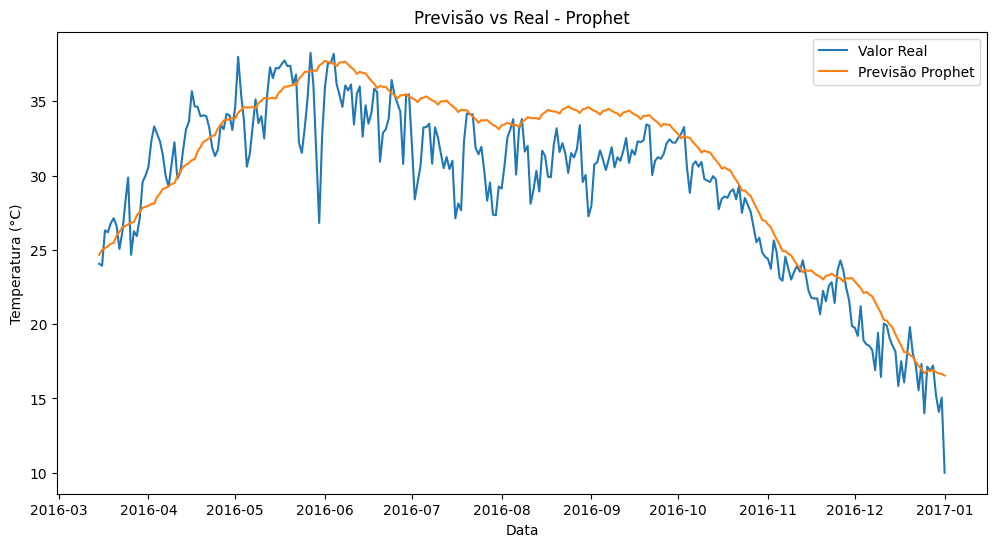

In [43]:
# Plotar as previsões vs valores reais
plt.figure(figsize=(12,6))
plt.plot(df_test_prophet['ds'], df_test_prophet['y'], label='Valor Real')
plt.plot(df_test_prophet['ds'], forecast_test['yhat'], label='Previsão Prophet')
plt.title('Previsão vs Real - Prophet')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


#lstm resultados

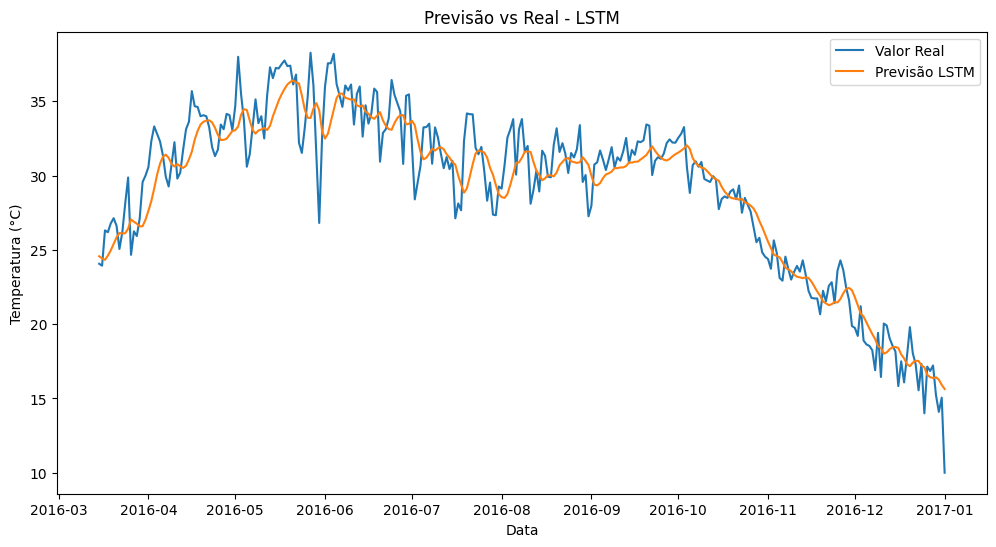

In [44]:
# Plotar as previsões vs valores reais
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Valor Real')
plt.plot(df.index[-len(y_test_inv):], predictions_inv, label='Previsão LSTM')
plt.title('Previsão vs Real - LSTM')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


Justificativa da Escolha da Métrica
Métrica Escolhida: Root Mean Squared Error (RMSE)

Justificativa:

O RMSE é uma métrica amplamente utilizada para avaliar a precisão de modelos de regressão e séries temporais. Ele representa a raiz quadrada da média dos quadrados dos erros, ou seja, a diferença quadrática média entre os valores previstos e os valores observados.

Escolhi o RMSE porque:

Sensibilidade a Grandes Erros: O RMSE penaliza mais severamente os erros maiores, já que os erros são elevados ao quadrado antes da média. Isso é importante em séries temporais, onde grandes desvios podem indicar problemas significativos no modelo.

Interpretação na Escala Original: O RMSE está na mesma unidade de medida da variável dependente (neste caso, temperatura em graus Celsius), o que facilita a interpretação dos resultados.